In [66]:
from IPython.display import IFrame

In [2]:
def whiteboard():
    return IFrame('http://dbt.arch.ethz.ch/temp/canvas', width=800, height=500)

# Introduction to COMPAS

## compas
https://compas-dev.github.io/

## import and check version

In [4]:
import compas

In [5]:
print(compas.__version__)

0.7.2


## get help

In [6]:
help(compas)

Help on package compas:

NAME
    compas

DESCRIPTION
    ********************************************************************************
    compas
    ********************************************************************************
    
    .. currentmodule:: compas
    
    
    .. toctree::
        :maxdepth: 1
    
        compas.datastructures
        compas.files
        compas.geometry
        compas.numerical
        compas.remote
        compas.robots
        compas.rpc
        compas.topology
        compas.utilities

PACKAGE CONTENTS
    _os
    com (package)
    datastructures (package)
    files (package)
    geometry (package)
    interop (package)
    numerical (package)
    plotters (package)
    remote (package)
    robots (package)
    rpc (package)
    topology (package)
    utilities (package)
    viewers (package)

FUNCTIONS
    raise_if_ironpython()
    
    raise_if_not_ironpython()
    
    raise_if_not_windows()
    
    raise_if_windows()

DATA
    __all__ =

## help on datastructures

In [8]:
import compas.datastructures
help(compas.datastructures)

Help on package compas.datastructures in compas:

NAME
    compas.datastructures

DESCRIPTION
    ********************************************************************************
    datastructures
    ********************************************************************************
    
    .. currentmodule:: compas.datastructures
    
    
    Mesh
    ====
    
    The mesh is implemented as a half-edge datastructure.
    It is meant for the representation of polygonal *"surface"* meshes. A mesh can be
    connected or disconnected. A mesh can be closed or open. A mesh can be comprised
    of only vertices.
    
    .. autosummary::
        :toctree: generated/
        :nosignatures:
    
        Mesh
    
    Mesh matrices
    -------------
    
    .. autosummary::
        :toctree: generated/
        :nosignatures:
    
        mesh_adjacency_matrix
        mesh_connectivity_matrix
        mesh_degree_matrix
        mesh_face_matrix
        mesh_laplacian_matrix
    
    .. autosu

## import the Mesh class

In [9]:
from compas.datastructures import Mesh

In [10]:
help(Mesh)

Help on class Mesh in module compas.datastructures:

class Mesh(compas.datastructures._mixins.FromToPickle, compas.datastructures._mixins.FromToJson, compas.datastructures._mixins.FromToData, compas.datastructures._mixins.EdgeGeometry, compas.datastructures._mixins.FaceHelpers, compas.datastructures._mixins.FaceFilter, compas.datastructures._mixins.EdgeHelpers, compas.datastructures._mixins.VertexHelpers, compas.datastructures._mixins.VertexFilter, compas.datastructures._mixins.EdgeFilter, compas.datastructures._mixins.FaceMappings, compas.datastructures._mixins.EdgeMappings, compas.datastructures._mixins.VertexMappings, compas.datastructures._mixins.FaceAttributesManagement, compas.datastructures._mixins.VertexAttributesManagement, Datastructure)
 |  Definition of a mesh.
 |  
 |  Attributes
 |  ----------
 |  attributes : dict
 |      A dictionary of general mesh attributes.
 |      The following items are built in:
 |  
 |      * ``'name'`` : ``'Mesh'``
 |  
 |  default_vertex_attri

## create a mesh

In [11]:
mesh = Mesh()

In [12]:
print(mesh.attributes)

{'name': 'Mesh'}


In [13]:
mesh.data

{'attributes': {'name': 'Mesh'},
 'dva': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'dea': {},
 'dfa': {},
 'vertex': {},
 'face': {},
 'facedata': {},
 'edgedata': {},
 'max_int_key': -1,
 'max_int_fkey': -1}

In [14]:
a = mesh.add_vertex()
b = mesh.add_vertex(x=1.0)
c = mesh.add_vertex(x=1.0, y=1.0)
d = mesh.add_vertex(y=1.0)

In [15]:
f = mesh.add_face([a,b,c,d])

In [16]:
mesh.summary()


Mesh summary

- name: Mesh
- vertices: 4
- edges: 4
- faces: 1
- vertex degree: 2/2
- face degree: 0/0




## display the mesh

In [19]:
from compas_plotters import MeshPlotter

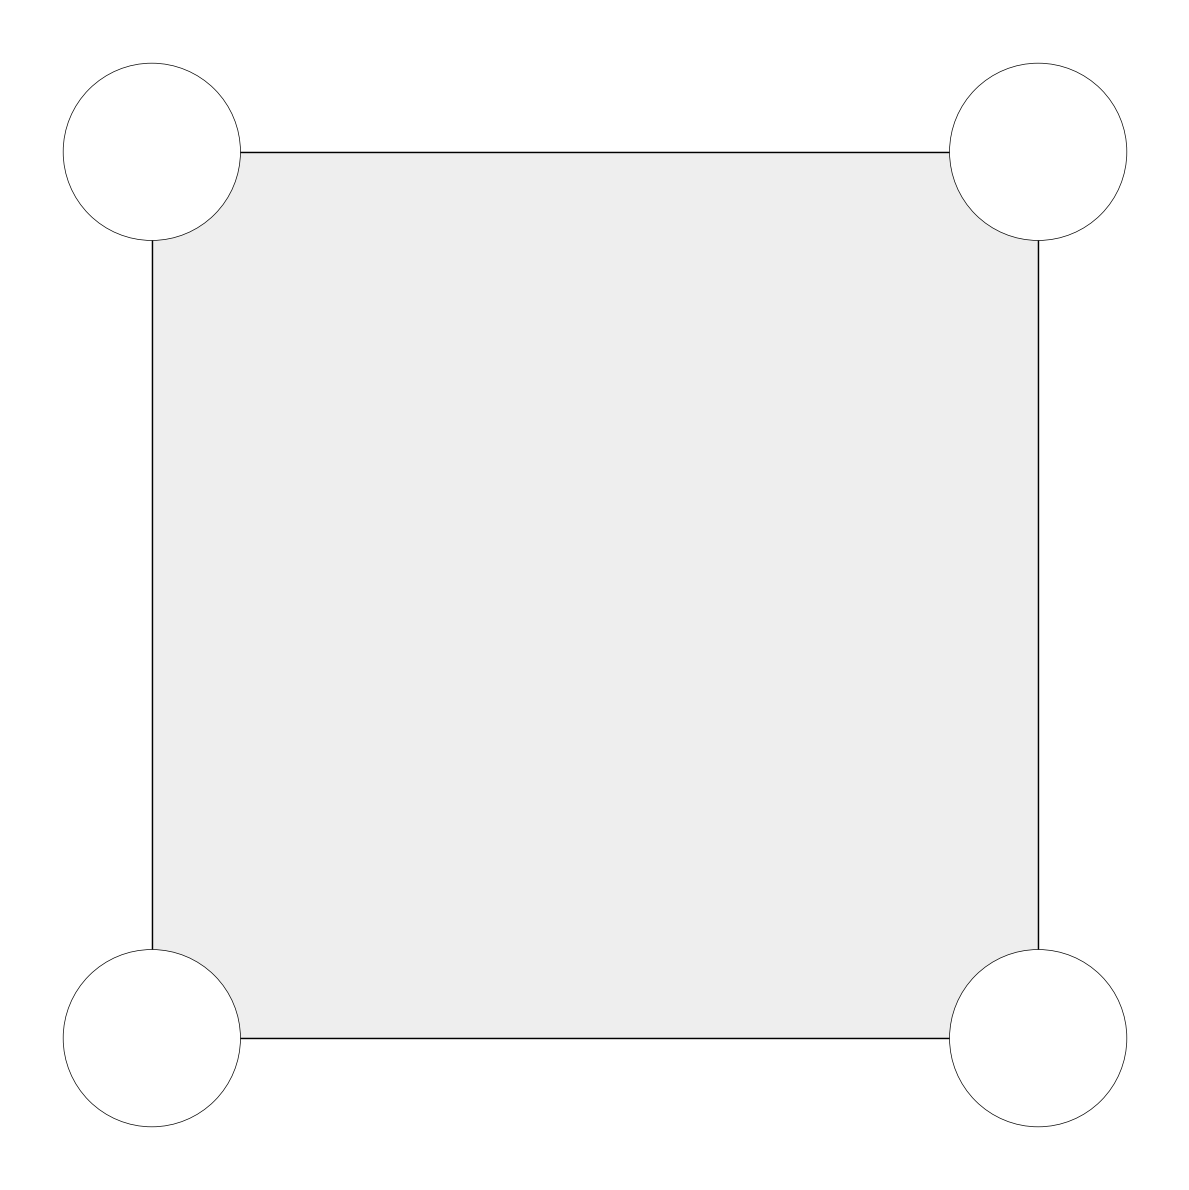

In [20]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()

## get attributes

In [17]:
for xyz in mesh.get_vertices_attributes('xyz'):
    print(xyz)

[0.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 1.0, 0.0]
[0.0, 1.0, 0.0]


In [18]:
for key in mesh.edges():
    print(key)

(0, 1)
(0, 3)
(1, 2)
(2, 3)


## add more vertices and faces

In [21]:
mesh.add_vertex(x=2, y=1)

4

In [22]:
mesh.add_face([1,2,4])

1

In [23]:
mesh.add_vertex(x=1, y=-1)
mesh.add_face([0,1,5])

2

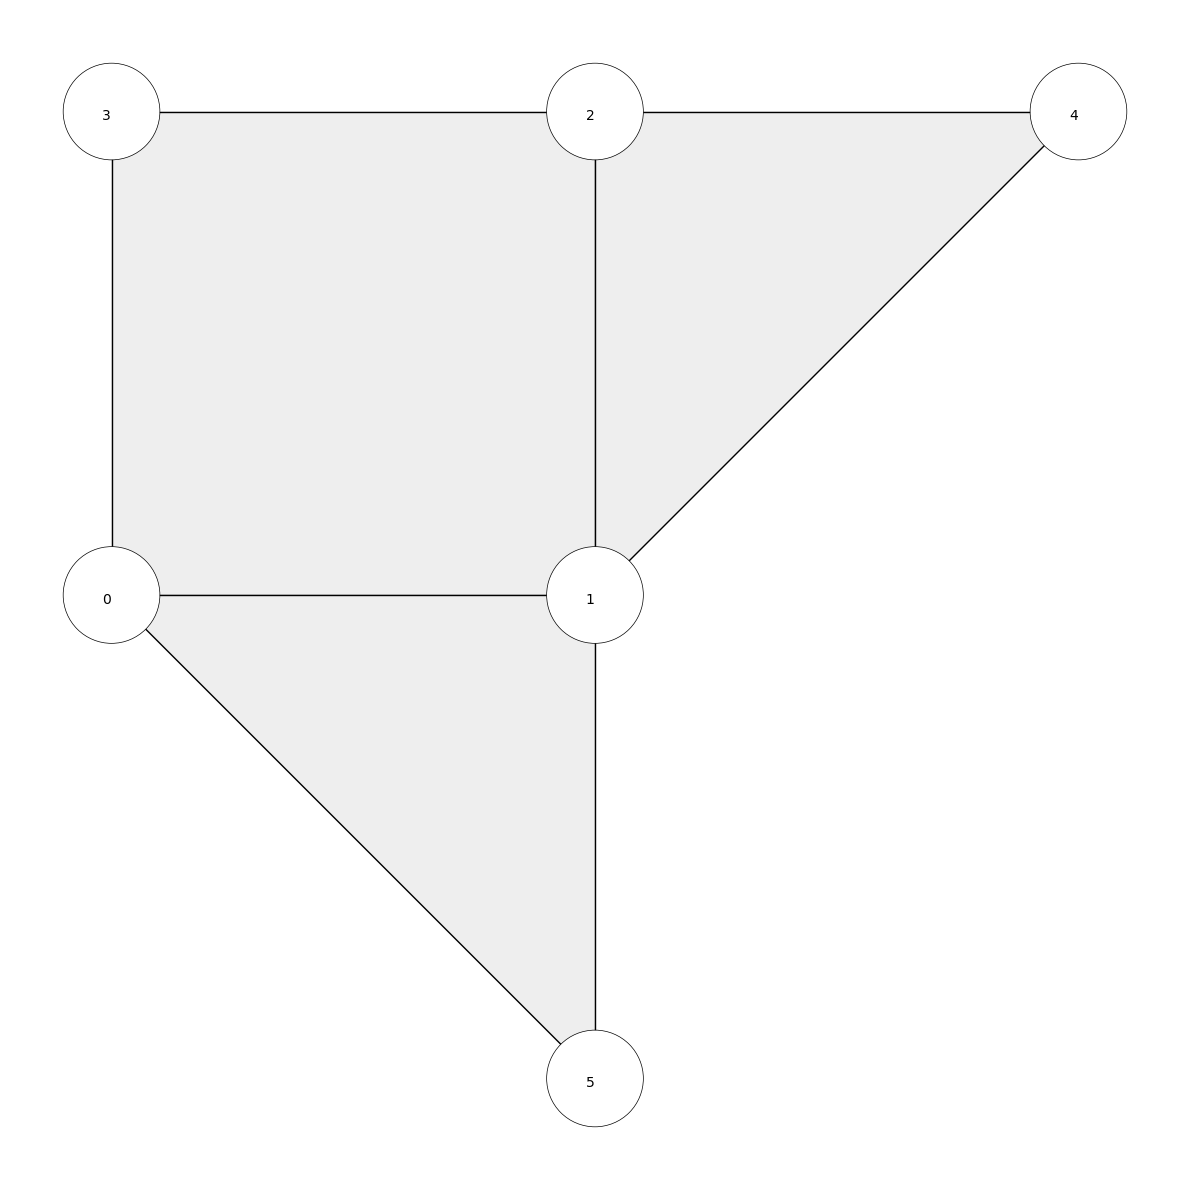

In [24]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_vertices(text={key: str(key) for key in mesh.vertices()})
plotter.draw_faces()
plotter.show()

## mesh properties

In [25]:
print(mesh.area())

2.0


In [26]:
mesh.add_face([1,4,5])

3

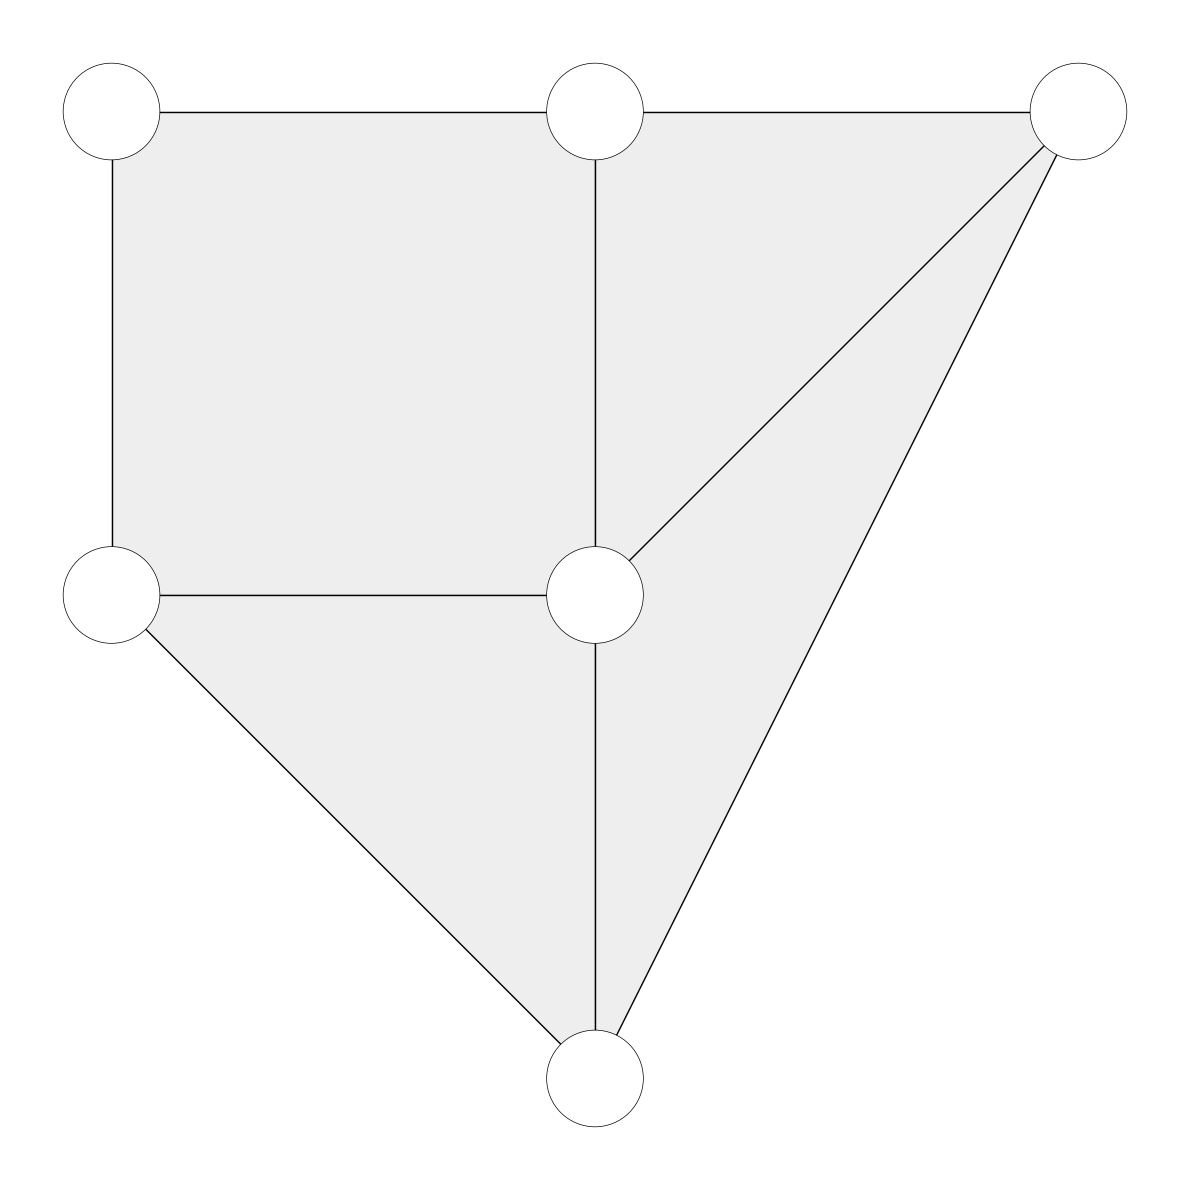

In [27]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()

In [28]:
mesh.summary()


Mesh summary

- name: Mesh
- vertices: 6
- edges: 9
- faces: 4
- vertex degree: 2/4
- face degree: 0/2




In [29]:
print(d)

3


In [32]:
mesh.data

{'attributes': {'name': 'Mesh'},
 'dva': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'dea': {},
 'dfa': {},
 'vertex': {'0': {'x': 0.0, 'y': 0.0, 'z': 0.0},
  '1': {'x': 1.0, 'y': 0.0, 'z': 0.0},
  '2': {'x': 1.0, 'y': 1.0, 'z': 0.0},
  '3': {'x': 0.0, 'y': 1.0, 'z': 0.0},
  '4': {'x': 2, 'y': 1, 'z': 0.0},
  '5': {'x': 1, 'y': -1, 'z': 0.0}},
 'face': {'0': ['0', '1', '2', '3'],
  '1': ['1', '2', '4'],
  '2': ['0', '1', '5'],
  '3': ['1', '4', '5']},
 'facedata': {'0': {}, '1': {}, '2': {}, '3': {}},
 'edgedata': {'(0, 1)': {},
  '(1, 0)': {},
  '(0, 3)': {},
  '(3, 0)': {},
  '(1, 2)': {},
  '(2, 1)': {},
  '(2, 3)': {},
  '(3, 2)': {},
  '(0, 5)': {},
  '(5, 0)': {},
  '(1, 4)': {},
  '(4, 1)': {},
  '(1, 5)': {},
  '(5, 1)': {},
  '(2, 4)': {},
  '(4, 2)': {},
  '(4, 5)': {},
  '(5, 4)': {}},
 'max_int_key': 5,
 'max_int_fkey': 3}

In [33]:
mesh.attributes

{'name': 'Mesh'}

## mesh from different inputs

In [34]:
mesh2 = Mesh.from_obj(compas.get('faces.obj'))

In [39]:
compas.get('faces.obj')

'/Users/bernham/Documents/Resources/ProgrammingLibraries/compas-dev/compas/data/faces.obj'

In [35]:
mesh2.summary()


Mesh summary

- name: Mesh
- vertices: 36
- edges: 60
- faces: 25
- vertex degree: 2/4
- face degree: 2/4




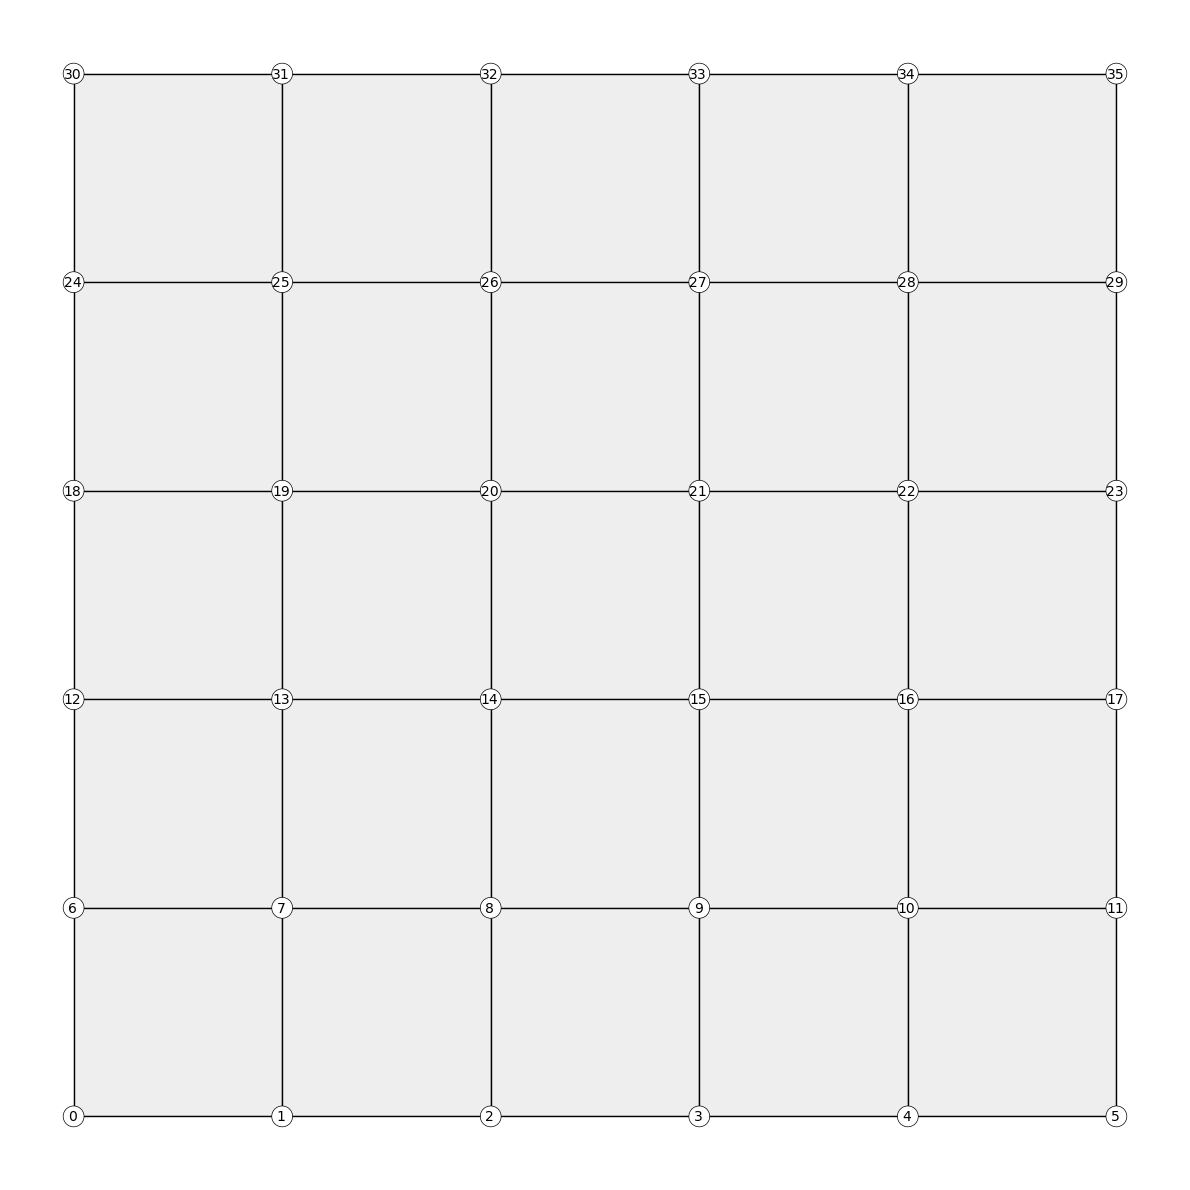

In [37]:
plotter = MeshPlotter(mesh2)
plotter.draw_edges()
plotter.draw_vertices(text={key: str(key) for key in mesh2.vertices()})
plotter.draw_faces()
plotter.show()

In [38]:
compas.get?

## arbitrary mesh, local path

In [42]:
# instead of relative path, put absolut path, something like '/Users/username/Documents/path/to/the/folder/delaunay.obj'
mesh3 = Mesh.from_obj('../resources/delaunay.obj')

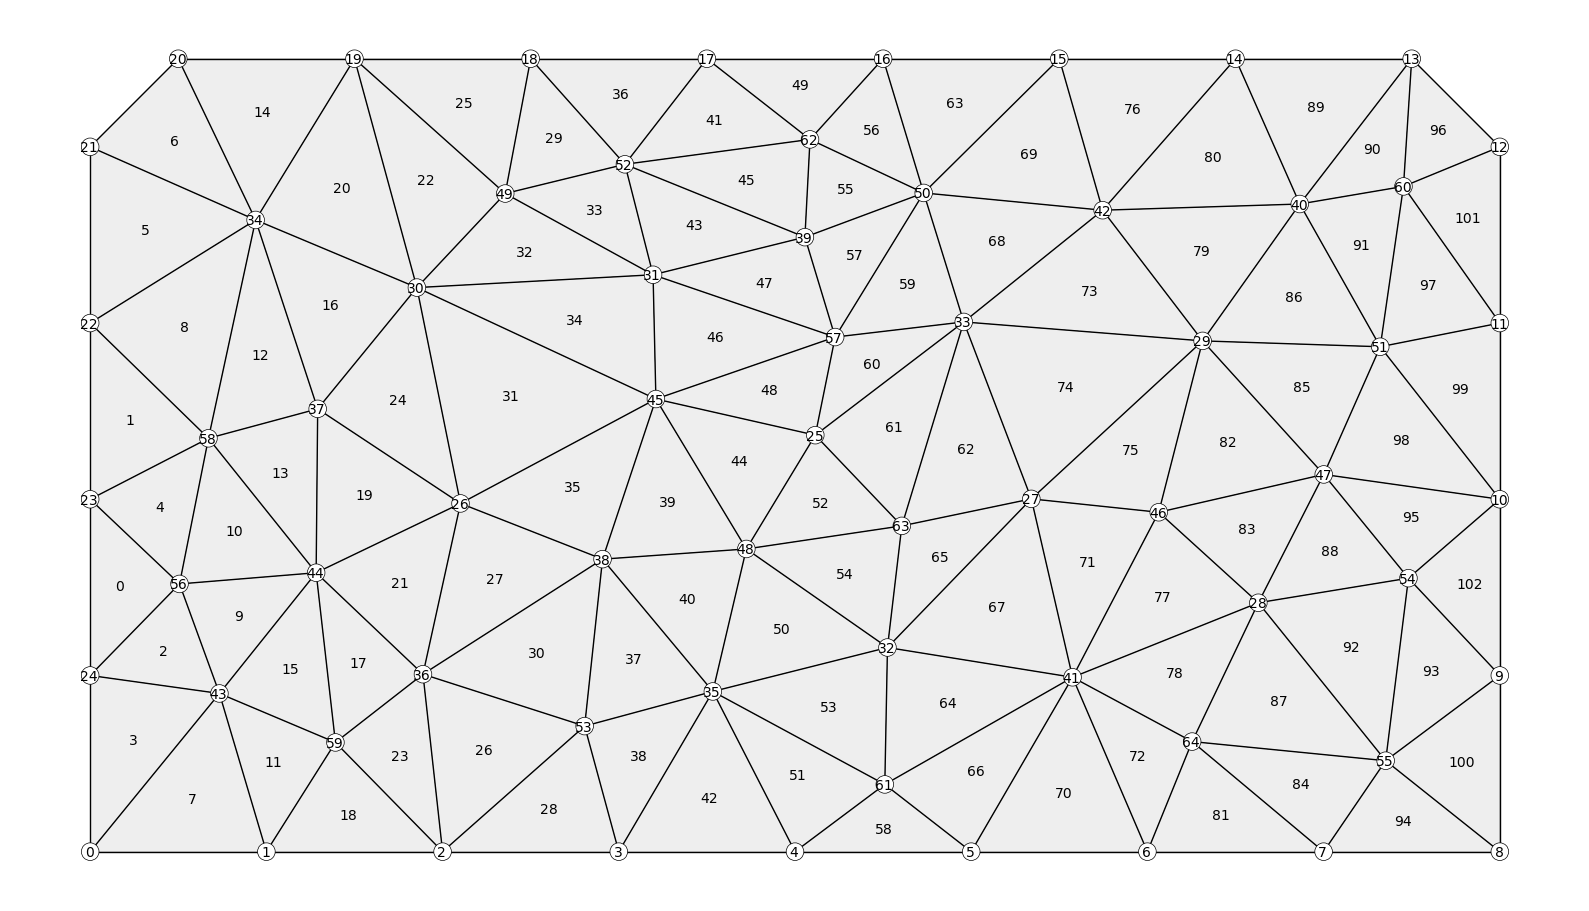

In [43]:
plotter = MeshPlotter(mesh3)
plotter.draw_edges()
plotter.draw_vertices(text={key: str(key) for key in mesh3.vertices()})
plotter.draw_faces(text={key: str(key) for key in mesh3.faces()})
plotter.show()

In [44]:
mesh3.summary()


Mesh summary

- name: Mesh
- vertices: 65
- edges: 167
- faces: 103
- vertex degree: 3/8
- face degree: 2/3




## connectivity

In [45]:
for key in mesh3.vertices():
    print(key, mesh3.vertex_neighbors(key, ordered=True))
    print(key, mesh3.vertex_faces(key, ordered=True))
    print()

0 [24, 43, 1]
0 [3, 7]

1 [0, 43, 59, 2]
1 [7, 11, 18]

2 [1, 59, 36, 53, 3]
2 [18, 23, 26, 28]

3 [2, 53, 35, 4]
3 [28, 38, 42]

4 [3, 35, 61, 5]
4 [42, 51, 58]

5 [4, 61, 41, 6]
5 [58, 66, 70]

6 [5, 41, 64, 7]
6 [70, 72, 81]

7 [6, 64, 55, 8]
7 [81, 84, 94]

8 [7, 55, 9]
8 [94, 100]

9 [8, 55, 54, 10]
9 [100, 93, 102]

10 [9, 54, 47, 51, 11]
10 [102, 95, 98, 99]

11 [10, 51, 60, 12]
11 [99, 97, 101]

12 [11, 60, 13]
12 [101, 96]

13 [12, 60, 40, 14]
13 [96, 90, 89]

14 [13, 40, 42, 15]
14 [89, 80, 76]

15 [14, 42, 50, 16]
15 [76, 69, 63]

16 [15, 50, 62, 17]
16 [63, 56, 49]

17 [16, 62, 52, 18]
17 [49, 41, 36]

18 [17, 52, 49, 19]
18 [36, 29, 25]

19 [18, 49, 30, 34, 20]
19 [25, 22, 20, 14]

20 [19, 34, 21]
20 [14, 6]

21 [20, 34, 22]
21 [6, 5]

22 [21, 34, 58, 23]
22 [5, 8, 1]

23 [22, 58, 56, 24]
23 [1, 4, 0]

24 [23, 56, 43, 0]
24 [0, 2, 3]

25 [48, 45, 57, 33, 63]
25 [52, 44, 48, 60, 61]

26 [44, 37, 30, 45, 38, 36]
26 [21, 19, 24, 31, 35, 27]

27 [63, 33, 29, 46, 41, 32]
27 [65

In [46]:
for key in mesh3.vertices():
    v_degree = mesh3.vertex_degree(key)
    if v_degree>=7:
        print(key, v_degree)

29 7
30 7
33 7
34 7
35 7
41 8
44 7
45 7
50 7


In [49]:
high_degrees = []
for key in mesh3.vertices():
    v_degree = mesh3.vertex_degree(key)
    if v_degree>=7:
        high_degrees.append(key)
print(high_degrees)

[29, 30, 33, 34, 35, 41, 44, 45, 50]


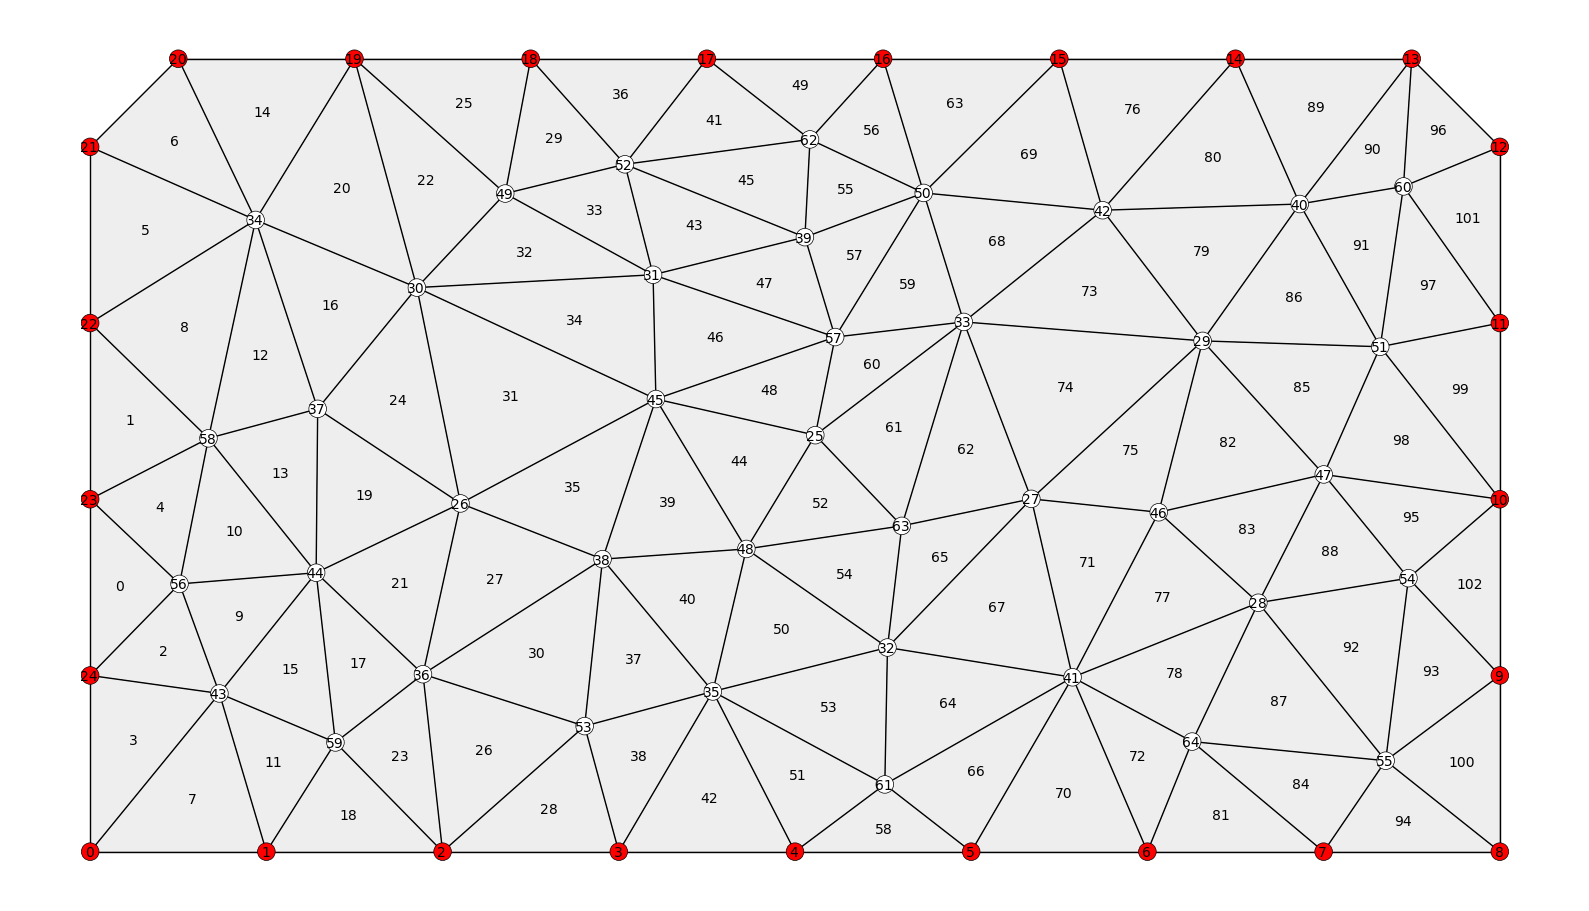

In [48]:
plotter = MeshPlotter(mesh3)
plotter.draw_edges()
plotter.draw_vertices(
    text={key: str(key) for key in mesh3.vertices()},
    facecolor={key: '#ff0000' for key in mesh3.vertices_on_boundary()}
)
plotter.draw_faces(text={key: str(key) for key in mesh3.faces()})
plotter.show()

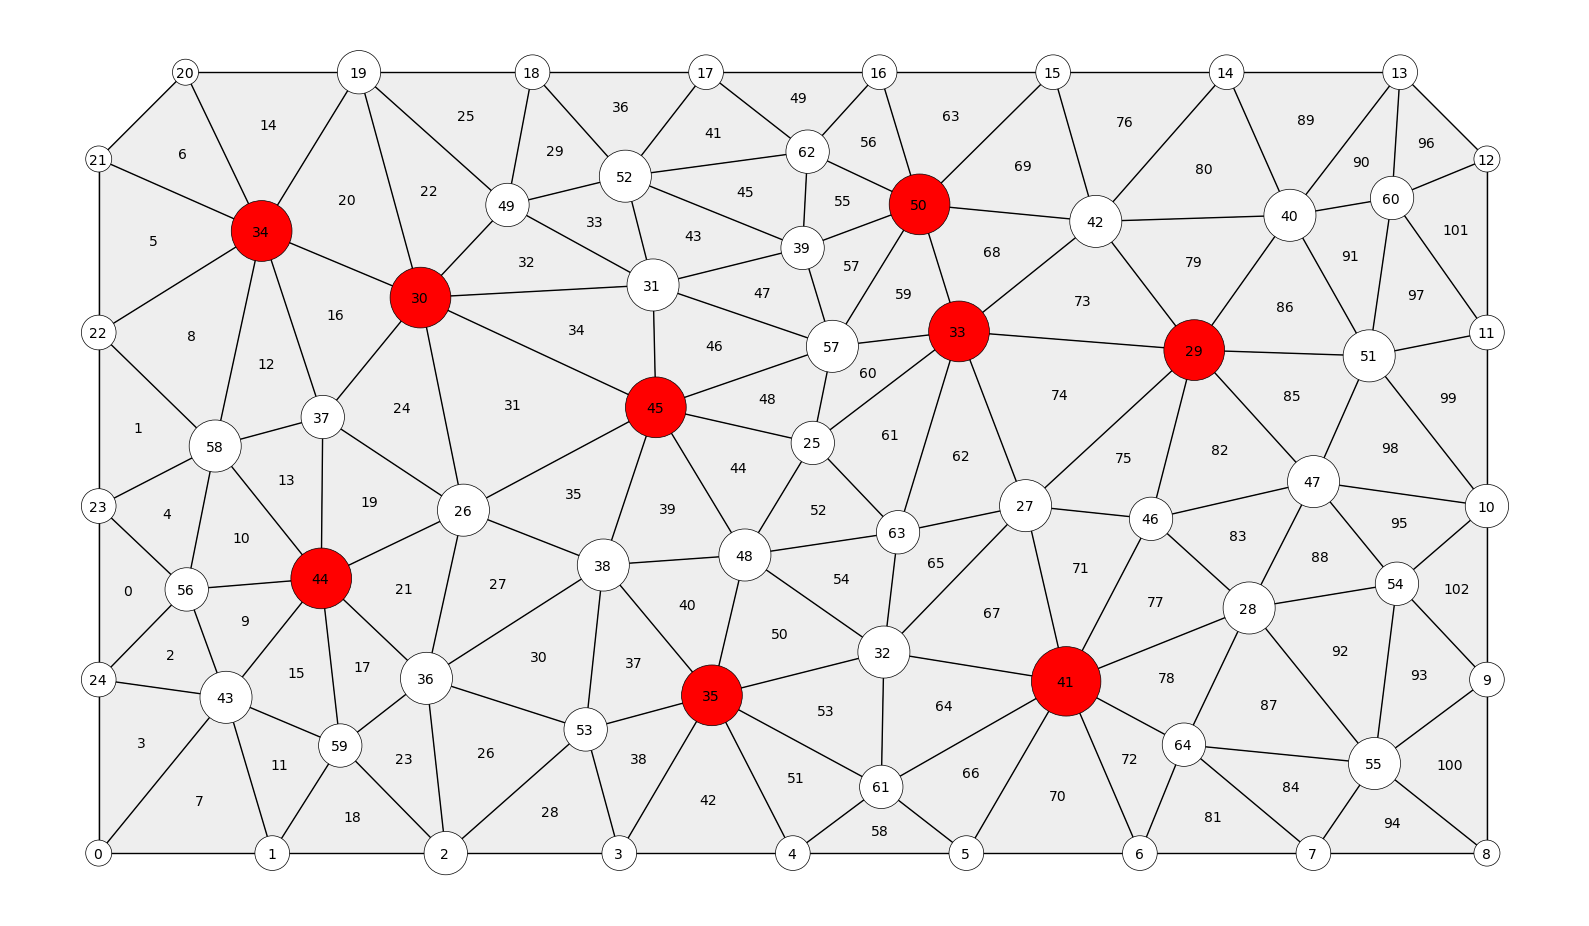

In [53]:
plotter = MeshPlotter(mesh3)
plotter.draw_edges()
plotter.draw_vertices(
    text={key: str(key) for key in mesh3.vertices()},
    facecolor={key: '#ff0000' for key in high_degrees},
    radius={key: mesh3.vertex_degree(key)/20 for key in mesh3.vertices()}
)
plotter.draw_faces(text={key: str(key) for key in mesh3.faces()})
plotter.show()

## ...for faces

In [55]:
for fkey in mesh3.faces():
    print(fkey, mesh3.face_vertices(fkey))
    print(fkey, mesh3.face_neighbors(fkey))
    print()

0 [24, 56, 23]
0 [2, 4]

1 [23, 58, 22]
1 [4, 8]

2 [24, 43, 56]
2 [3, 9, 0]

3 [24, 0, 43]
3 [7, 2]

4 [23, 56, 58]
4 [0, 10, 1]

5 [22, 34, 21]
5 [8, 6]

6 [21, 34, 20]
6 [5, 14]

7 [0, 1, 43]
7 [11, 3]

8 [22, 58, 34]
8 [1, 12, 5]

9 [56, 43, 44]
9 [2, 15, 10]

10 [56, 44, 58]
10 [9, 13, 4]

11 [43, 1, 59]
11 [7, 18, 15]

12 [58, 37, 34]
12 [13, 16, 8]

13 [58, 44, 37]
13 [10, 19, 12]

14 [20, 34, 19]
14 [6, 20]

15 [43, 59, 44]
15 [11, 17, 9]

16 [34, 37, 30]
16 [12, 24, 20]

17 [44, 59, 36]
17 [15, 23, 21]

18 [1, 2, 59]
18 [23, 11]

19 [44, 26, 37]
19 [21, 24, 13]

20 [34, 30, 19]
20 [16, 22, 14]

21 [44, 36, 26]
21 [17, 27, 19]

22 [19, 30, 49]
22 [20, 32, 25]

23 [59, 2, 36]
23 [18, 26, 17]

24 [37, 26, 30]
24 [19, 31, 16]

25 [19, 49, 18]
25 [22, 29]

26 [36, 2, 53]
26 [23, 28, 30]

27 [36, 38, 26]
27 [30, 35, 21]

28 [2, 3, 53]
28 [38, 26]

29 [49, 52, 18]
29 [33, 36, 25]

30 [36, 53, 38]
30 [26, 37, 27]

31 [30, 26, 45]
31 [24, 35, 34]

32 [30, 31, 49]
32 [34, 33, 22]

33 [4

In [59]:
plotter.draw_vertices?

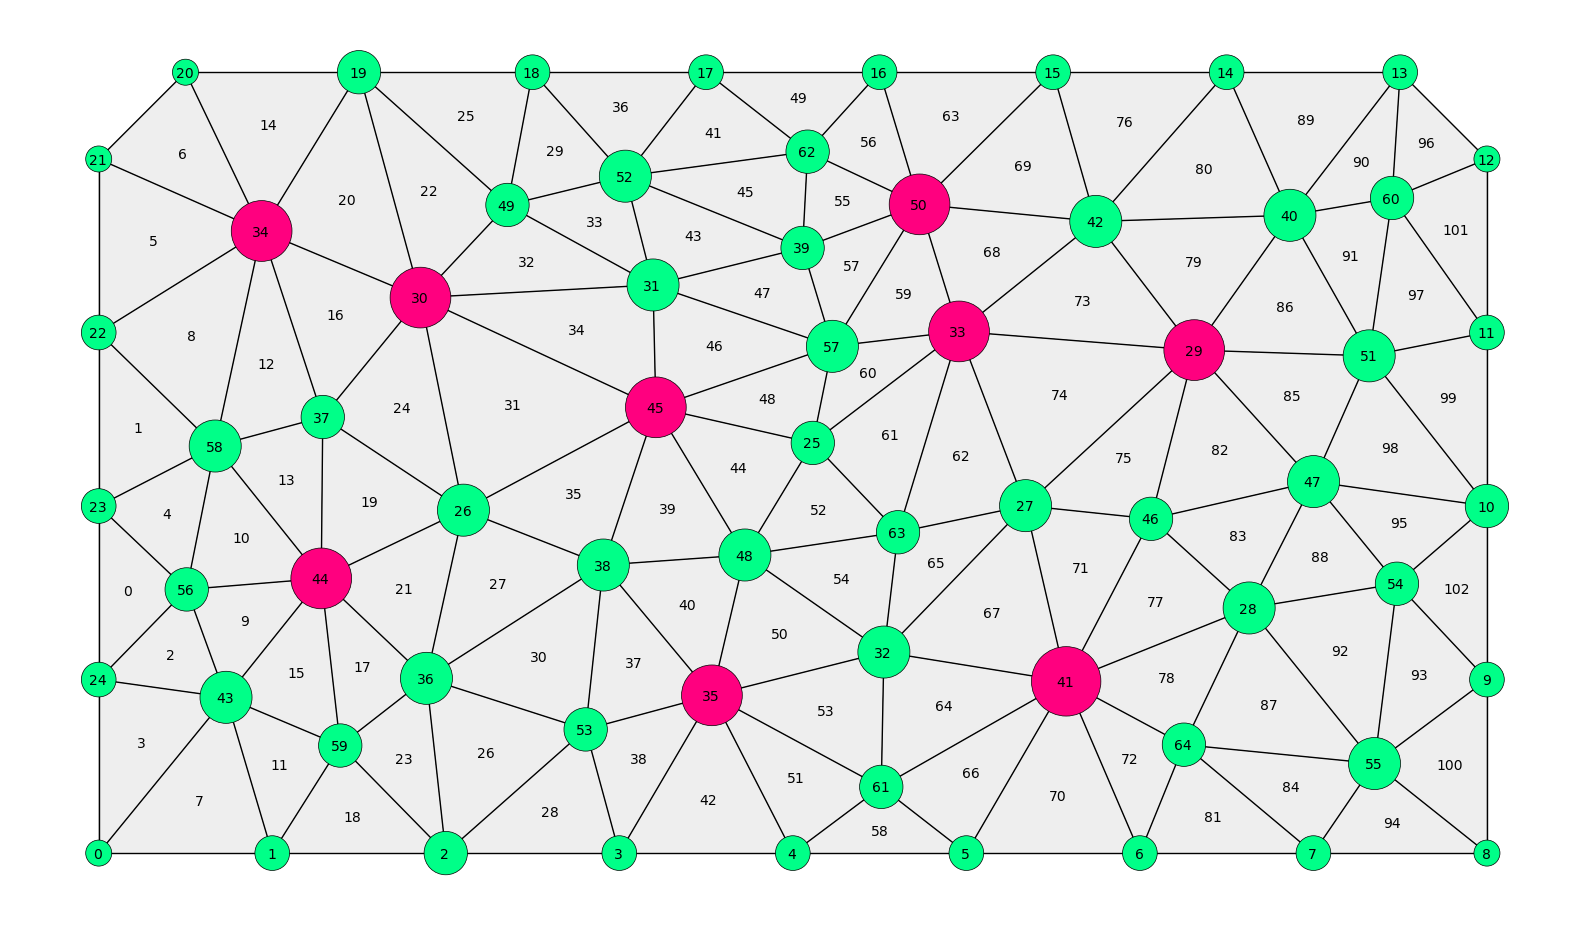

In [61]:
color_keys = {}
for key in mesh3.vertices():
    if key in high_degrees:
        color_keys[key]=[255,0,127]
    else:
        color_keys[key]='#00ff88'
        
plotter = MeshPlotter(mesh3)
plotter.draw_edges()
plotter.draw_vertices(
    text={key: str(key) for key in mesh3.vertices()},
    facecolor=color_keys,
    radius={key: mesh3.vertex_degree(key)/20 for key in mesh3.vertices()}
)
plotter.draw_faces(text={key: str(key) for key in mesh3.faces()})
plotter.show()

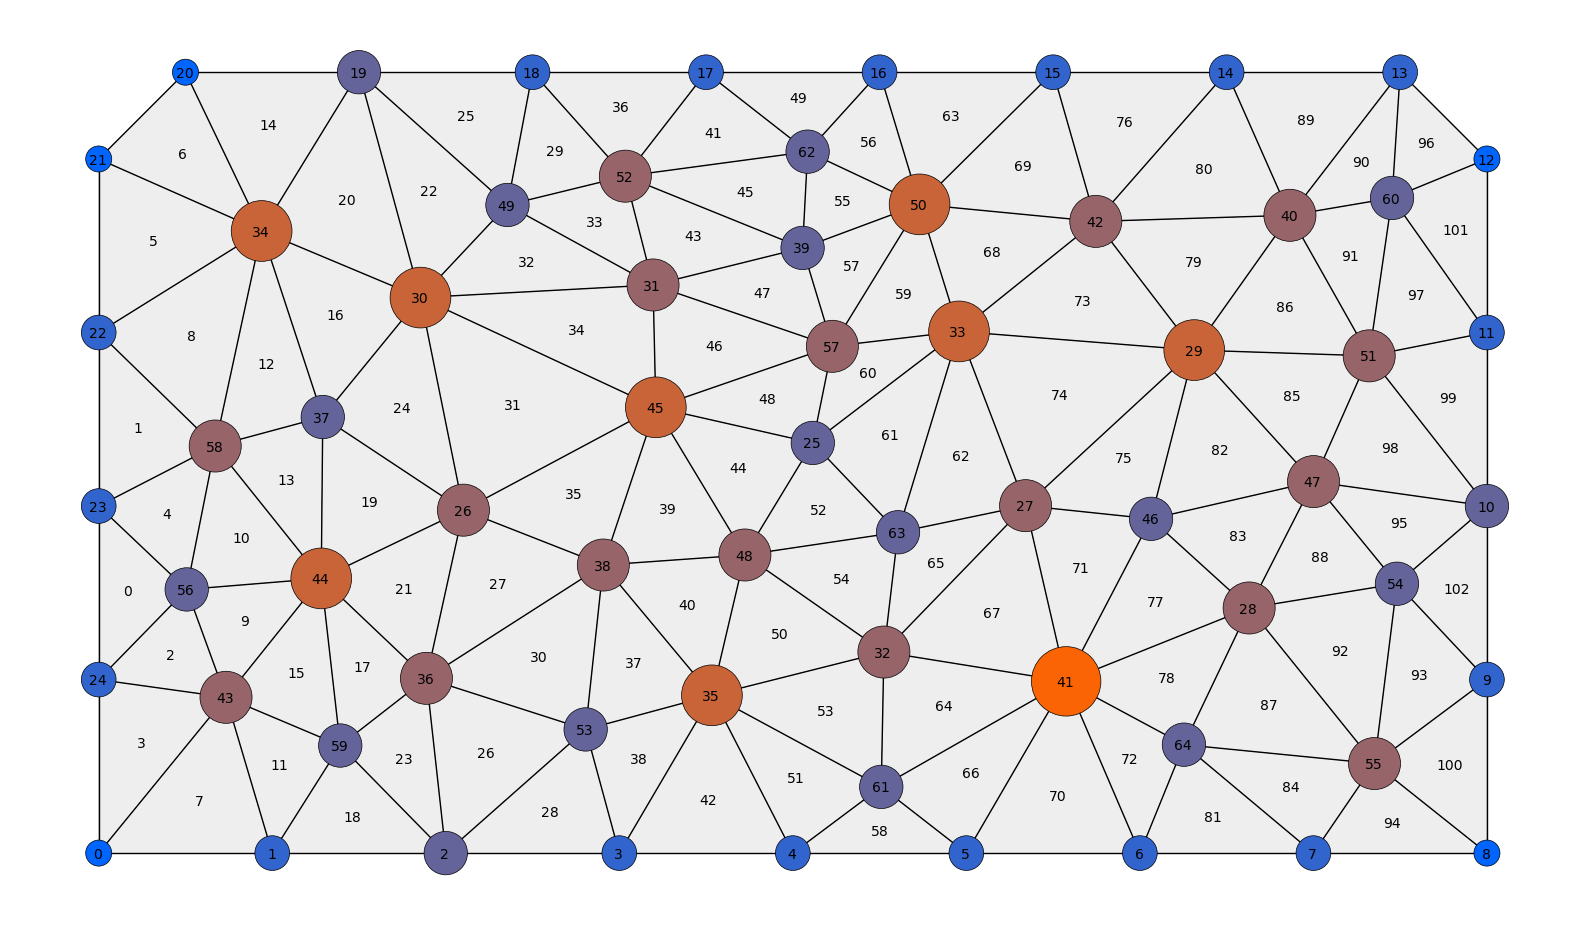

In [69]:
color_keys = {}
for key in mesh3.vertices():
    vd = mesh3.vertex_degree(key)
    vd = vd-3
    color_keys[key] = [vd*50,100,255-(vd*50)]

plotter = MeshPlotter(mesh3)
plotter.draw_edges()
plotter.draw_vertices(
    text={key: str(key) for key in mesh3.vertices()},
    facecolor=color_keys,
    radius={key: mesh3.vertex_degree(key)/20 for key in mesh3.vertices()}
)
plotter.draw_faces(text={key: str(key) for key in mesh3.faces()})
plotter.show()

<img src='mesh_dual.png'/>